For this problem set, we'll be using the Jupyter notebook:

<img src='../../jupyter.png' width=100>

---

# Assignment 1

In this assignment, we are going to practice analyzing a network using the various measurements and metrics that we learn this week. You will need to choose one of the following datasets to build your network and explore its features. In the end, based on your exploration, you are supposed complete a prediction task which should meet certain criteria. Note that based on the characteristics of different networks, the criteria might not be the same among different networks.

## Datasets description

### 1. Star wars interaction graph

- `starwars-full-interactions.json`: named characters in Star Wars and their interactions. Each character is treated as a node, and an edge is created if two characters has ever appeared in a same scene.

> Source: Gabasova, E. (2016). Star Wars social network. DOI: https://doi.org/10.5281/zenodo.1411479.

- `star_war_label.csv`: labels of the characters, with 1 indicating the character is frequently appeared in the TV series and 0 otherwise. Orders of the names and labels are the same as their node number.

### 2. Facebook friendships

- `slavko.net`: edgelist of the friendship network. Each node represents a user on Facebook.

> Blagus, N., Šubelj, L. & Bajec, M. (2012). [*Self-similar scaling of density in complex real-world networks*](http://wwwlovre.appspot.com/resources/research/bibs/ssd.bib), Physica A: Statistical Mechanics and its Applications 391(8), 2794-2802, doi:[10.1016/j.physa.2011.12.055](http://dx.doi.org/10.1016/j.physa.2011.12.055), e-print [arXiv:1110.5609](http://arxiv.org/abs/1110.5609), [COBISS:8930132](http://cobiss.izum.si/scripts/cobiss?command=DISPLAY&lani=en&base=COBIB&RID=8930132).

- `slavko_label.txt`: labels of the nodes, whose order corresponds to node numbers in the network. Labels are indications of influence in the network, with 1 for "somewhat" influential and 0 for not influential.

### 3. Students’ Cooperation Social Network

- `multigraph_hashAnonymized.csv`: list of cooperation between students. Each number represents a student and a node in the cooperation network. An edge between two nodes indicates that the corresponding two students have cooperated in at least one academic activity.</font>

> Fire, M., Katz, G., Elovici, Y., Shapira, B., and Rokach, L. Fire, Michael, et al. "Predicting student exam’s scores by analyzing social network data." Active Media Technology. Springer Berlin Heidelberg, 2012. 584-595.

- `multigraph_label.txt`: Labels for the nodes. Labels indicate academic improvements students made over the period of cooperation: 1 for improved and 0 for no obvious improvements.


In [3]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import json
import operator

import matplotlib.pyplot as plt
import seaborn as sns

### BEGIN SOLUTION 
# Additional libraries within this block
### END SOLUTION 

---

## Part 1. Data exploration

We provid an API `get_graph` for you, which extracts a dataset and create a network on it based on your choice of data source. Please use one of the following as input for the dataset you choose:

- `"starwar"`
- `"facebook"`
- `"student"`

In [4]:
def get_graph(dataset):
    if dataset == "starwar":
        f=open("assets/starwars-full-interactions.json")
        data = json.load(f)
        char_map = {entry['name']: i for i, entry in enumerate(data['nodes'])}
        edges = [(edge['source'], edge['target']) for edge in data['links']]
        G=nx.Graph()
        G.add_nodes_from([i for i in range(len(char_map))])
        G.add_edges_from(edges)
    elif dataset == "facebook":
        G = nx.read_edgelist("assets/slavko.net", nodetype=int)
    elif dataset == "student":
        G = nx.read_edgelist("assets/student.txt", nodetype=int)
    else:
        raise ValueError("Not a valid dataset")
    return G

### Please indicate your choice of data in the cell below, using one of 


- `"starwar"`
- `"facebook"`
- `"student"`

In [38]:
DATASET = None
### BEGIN SOLUTION 
DATASET = "student"
### END SOLUTION

In [6]:
### BEGIN HIDDEN TESTS
assert DATASET in {"starwar","facebook","student"}
### END HIDDEN TESTS

### Q1. Plot the histogram of degree distribution.
Hint: you may want to use the [`degree_histogram`](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.degree_histogram.html#networkx.classes.function.degree_histogram) function, for example,
```python
img = plt.bar(x, y)
```

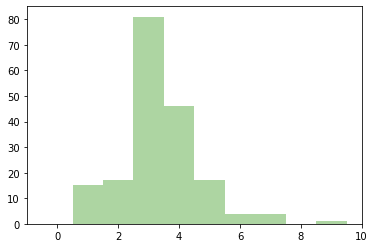

In [39]:
# get graph
G = None    # assign your graph here
img = None  # assign your plt.bar plot to img

### BEGIN SOLUTION 
G = get_graph(DATASET)
freq = nx.degree_histogram(G);
img = plt.bar(x=[i for i in range(len(freq))], height=freq, width=1, color='#add5a2');
plt.show()
### END SOLUTION

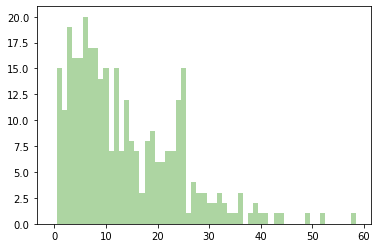

In [17]:
### BEGIN HIDDEN TESTS
# get graph
G2 = get_graph(DATASET)
assert len(G2.nodes) == len(G.nodes)

# get degree distribution plot
freq = nx.degree_histogram(G2);
img2 = plt.bar(x=[i for i in range(len(freq))], height=freq, width=1, color='#add5a2');
assert len(img) == len(img2)

bars1 = []
bars2 = []
for i in range(len(img)):
    bars1.append([img[i]._x0, img[i]._x1, img[i]._y0, img[i]._y1])
    bars2.append([img2[i]._x0, img2[i]._x1, img2[i]._y0, img2[i]._y1])
assert bars1 == bars2
### END HIDDEN TESTS

### Q2. Which node has the largest degree centrality?

In [8]:
node_max_degree = None
val_deg = None

### BEGIN SOLUTION 
node_max_degree, val_deg = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1])[-1]
### END SOLUTION

In [9]:
#hidden tests are within this cell
node_max_degree2, val_deg2 = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1])[-1]
### BEGIN HIDDEN TESTS
assert node_max_degree == node_max_degree2
assert abs(val_deg - val_deg2) < 0.001
### END HIDDEN TESTS

### Q3. List 5 nodes with the largest closeness centrality and 5 nodes with the least closeness centrality.

In [10]:
max_5_cc = None
min_5_cc = None
### BEGIN SOLUTION 
result = sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1])
max_5_cc = [i for i, v in result[-5:]]
min_5_cc = [i for i, v in result[:5]]
### END SOLUTION

In [11]:
#hidden tests are within this cell
### BEGIN HIDDEN TESTS
result = sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1])
max_5_cc2 = [i for i, v in result[-5:]]
min_5_cc2 = [i for i, v in result[:5]]
assert set(max_5_cc) == set(max_5_cc2)
assert set(min_5_cc) == set(min_5_cc2)
### END HIDDEN TESTS

### Q4. List 5 nodes with the largest betweenness centrality and 5 nodes with the least betweenness centrality. Does the sets of nodes overlap with your results in Q3?

In [12]:
max_5_bc = None
min_5_bc = None

### BEGIN SOLUTION 
result = sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1])
max_5_bc = [i for i, v in result[-5:]]
min_5_bc = [i for i, v in result[:5]]
### END SOLUTION

In [13]:
### BEGIN HIDDEN TESTS
result = sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1])
max_5_bc2 = [i for i, v in result[-5:]]
min_5_bc2 = [i for i, v in result[:5]]
assert set(max_5_bc) == set(max_5_bc2)
assert set(min_5_bc) == set(min_5_bc2)
### END HIDDEN TESTS

### Q5. What is the average clustering coefficient and graph transitivity of the network?

Both graph transitivity and clustering coefficient measure the number of triangles in a network. However, transitivity measures the density of triangles in a network, whereas average clustering coefficient measures the average tendency of nodes clustering together.

In [14]:
graph_trans = None
avg_clustering = None

### BEGIN SOLUTION 
graph_trans = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)
### END SOLUTION

In [15]:
### BEGIN HIDDEN TESTS
graph_trans2 = nx.transitivity(G)
avg_clustering2 = nx.average_clustering(G)
assert abs(graph_trans - graph_trans2) < 0.001
assert abs(avg_clustering - avg_clustering2) < 0.001
### END HIDDEN TESTS

### Q6. What are the 3 nodes with the largest pagerank values in the graph? (Use damping coefficient $\alpha = 0.9$). Are they connect to each other?

Hint: [`Graph.has_edge`](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.Graph.has_edge.html?highlight=has_edge#networkx.Graph.has_edge)

In [16]:
result, has_edge12, has_edge13, has_edge23 = None, None, None, None

### BEGIN SOLUTION 
result = sorted(nx.pagerank(G, alpha=0.9).items(), key=lambda item: item[1])[:3]
result = [i for i, _ in result]
has_edge12 = G.has_edge(result[0], result[1])
has_edge13 = G.has_edge(result[0], result[2])
has_edge23 = G.has_edge(result[1], result[2])
### END SOLUTION

In [17]:
### BEGIN HIDDEN TESTS
result2 = sorted(nx.pagerank(G, alpha=0.9).items(), key=lambda item: item[1])[:3]
result2 = [i for i, _ in result2]
has2_edge12 = G.has_edge(result2[0], result2[1])
has2_edge13 = G.has_edge(result2[0], result2[2])
has2_edge23 = G.has_edge(result2[1], result2[2])
assert set(result) == set(result2)
assert has_edge12 == has2_edge12
assert has_edge13 == has2_edge13
assert has_edge23 == has2_edge23
### END HIDDEN TESTS

### Q7. List 5 nodes with the largest Hubs scores and 5 nodes with the largest Authority values. Explain why the two sets of nodes are the same.

In [18]:
h5 = None  # nodes with largest hub scores
a5 = None  # nodes with largest authority scores
### BEGIN SOLUTION 
h, a = nx.hits(G, max_iter=200)
h5 = sorted(h.items(), key=lambda item: item[1])[:5]
a5 = sorted(a.items(), key=lambda item: item[1])[:5]
h5 = [i for i, v in h5]
a5 = [i for i, v in a5]
### END SOLUTION

#### Answer

Because this is an undirected graph.

In [19]:
### BEGIN HIDDEN TESTS
h, a = nx.hits(G, max_iter=200)
h52 = sorted(h.items(), key=lambda item: item[1])[:5]
a52 = sorted(a.items(), key=lambda item: item[1])[:5]
h52 = [i for i, v in h52]
a52 = [i for i, v in a52]
assert set(h5) == set(h52)
assert set(a5) == set(a52)
### END HIDDEN TESTS

---

## Part 2. Node importance and graph connected components

In this part, we are going to remove nodes from a graph and see what effect that has to the number of connected components in the graph.

Starting with the full graph, compute the number of connected components. Then remove nodes one at a time and after each node removal compute the number of connected components. We provide 3 strategies to remove the nodes: 

1. Each time, choose a node randomly.
2. Remove the node with the highest degree centrality in the current graph. 
3. Remove the node with the highest betweenness centrality in the current graph.

The goal is testing what strategy for node removal will fragment the graph faster. 

---
**<font color='red'>Note: </font>** please use the **facebook** network for this part.

### Q8. Make a plot of the number of nodes removed vs. the number of connected components (three curves in a single plot) for the first `threshold` operations (threshold is selected based on the total number of nodes in the graph). Determine which strategy makes the number of components increase faster. 

In [48]:
import copy
import random

### BEGIN SOLUTION 
# additional libraries goes here
### END SOLUTION 

Make sure that you are using the "facebook" graph for questions below this cell, if you haven't already.

In [57]:
# if you are already using facebook dataset, you may skip this cell.
### BEGIN SOLUTION 
G = get_graph("facebook")
### END SOLUTION 

In [58]:
### BEGIN HIDDEN TESTS
Gf = get_graph("facebook")
assert len(G.nodes) == len(Gf.nodes)
### END HIDDEN TESTS

#### Randomly-chosen

In [49]:
random.seed(0)
G1 = copy.deepcopy(G)
rand_move = [nx.number_connected_components(G1)]


### BEGIN SOLUTION 
for i in range(150):
    nd = random.choice(list(G1.nodes))
    G1.remove_node(nd)
    rand_move.append(nx.number_connected_components(G1))
### END SOLUTION

In [50]:
### BEGIN HIDDEN TESTS
random.seed(0)
G11 = copy.deepcopy(G)
rand_move2 = [nx.number_connected_components(G11)]

for i in range(150):
    nd = random.choice(list(G11.nodes))
    G11.remove_node(nd)
    rand_move2.append(nx.number_connected_components(G11))
assert rand_move == rand_move2
### END HIDDEN TESTS

#### Remove node with highest degree centrality

In [51]:
G1 = copy.deepcopy(G)
deg_move = [nx.number_connected_components(G1)]

### BEGIN SOLUTION 
for i in range(150):
    nd, _ = sorted(nx.degree_centrality(G1).items(), key=lambda item: item[1])[-1]
    G1.remove_node(nd)
    deg_move.append(nx.number_connected_components(G1))
### END SOLUTION

In [52]:
### BEGIN HIDDEN TESTS
G11 = copy.deepcopy(G)
deg_move2 = [nx.number_connected_components(G11)]

for i in range(150):
    nd, _ = sorted(nx.degree_centrality(G11).items(), key=lambda item: item[1])[-1]
    G11.remove_node(nd)
    deg_move2.append(nx.number_connected_components(G11))
assert deg_move == deg_move2
### END HIDDEN TESTS

#### Remove node with highest betweenness centrality

In [53]:
G1 = copy.deepcopy(G)
bet_move = [nx.number_connected_components(G1)]

### BEGIN SOLUTION 
for i in range(150):
    nd, _ = sorted(nx.betweenness_centrality(G1).items(), key=lambda item: item[1])[-1]
    G1.remove_node(nd)
    bet_move.append(nx.number_connected_components(G1))
### END SOLUTION

In [54]:
### BEGIN HIDDEN TESTS
G11 = copy.deepcopy(G)
bet_move2 = [nx.number_connected_components(G11)]

for i in range(150):
    nd, _ = sorted(nx.betweenness_centrality(G11).items(), key=lambda item: item[1])[-1]
    G11.remove_node(nd)
    bet_move2.append(nx.number_connected_components(G11))
assert bet_move == bet_move2
### END HIDDEN TESTS

#### Create a plot

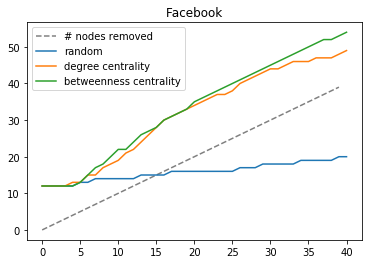

In [55]:
### BEGIN SOLUTION
nodes = [i for i in range(150)]
plt.plot(nodes, '--', color='grey', label='# nodes removed')
plt.plot(rand_move, label='random')
plt.plot(deg_move, label='degree centrality')
plt.plot(bet_move, label='betweenness centrality')
plt.legend()
plt.title('Facebook');
### END SOLUTION

### Q9. For the strategy you select in Q8, why do you think it is faster than the other two strategies?

#### Answer
<font color='gray'>Betweenness centrality is the fastest. Because it measures the importance of nodes connected others.</font>

---

## Part 3. Prediction

In this part, you are going to complete a supervised prediction task on the **facebook** network. The task to predict whether a node is an "influential" user in the network. We privide two files for you:

1. `facebook_train.csv` is the traning set.
2. `facebook_test.csv` is the test set, which is provided for you to evaluate the effectiveness of your model.

We provide a label for each node with `True` indicating the node is "influential" and `False` otherwise. Use the node attributes we explored in part 1 to serve as features for this prediction. Starting from using only a single node attribute as feature, after train your model and evaluate your prediction results, add a new attribute to your existing features and see how it affects your model efficiency.

---

**<font color='red'>Notice:</font>**

1. use `sklearn.metrics.f1_score` to evaluate your prediction.
2. use sklearn [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model as your supervised model.
3. the label are synthesized to fulfill this prediction task. Therefore, there might be some data leakage problems. Please don't worry too much about it, and focus on the process of adding node features for prediction.
4. you can use the `normalize(col)` function provided to normalize the values of a given dataframe column.
5. you can only get full marks if your prediction results achives a f1 score higher than 0.85.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

### BEGIN SOLUTION 
# additional libraries goes here
### END SOLUTION 

In [68]:
predic_labels = None

### BEGIN SOLUTION
train = pd.read_csv('assets/facebook_train.csv')
test = pd.read_csv('assets/facebook_test.csv')

df = pd.DataFrame({'node':G.nodes()})
# get degree of nodes and store in df
df['degree'] = dict(nx.degree(G)).values()
df['degree_centrality'] = nx.degree_centrality(G).values()
df['clustering'] = nx.clustering(G).values()
df['closeness_centrality'] = nx.closeness_centrality(G).values()
df['betweenness_centrality'] = nx.betweenness_centrality(G).values()
df['pagerank'] = nx.pagerank(G, alpha=0.9).values()
# since our graph is undirected, the values for hubs and authorities are the same
h, _ = nx.hits(G, max_iter=200)
df['hits'] = h.values()


X_train = df[df.node.isin(train.node)][df.columns[2:8]].to_numpy()
y_train = train.label
X_test = df[df.node.isin(test.node)][df.columns[2:8]].to_numpy()

clf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predic_labels = clf.predict(X_test)
# print(f1_score(predic_labels, y_test))
### END SOLUTION

In [70]:
### BEGIN HIDDEN TESTS
score = 0
try:
    test = pd.read_csv('assets/facebook_raw_test.csv')
    score = f1_score(test.label, predic_labels)
except:
    pass
assert score > 0.85
### END HIDDEN TESTS